In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import cheyette as ch

plt.style.use('input/qulib.mplstyle')

# Single Period Swaption

In [9]:
curve = ch.FlatCurve(short_rate=0.01)
mean_rev = 0.01
local_vol = 0.02
process = ch.VasicekProcess(mean_rev=mean_rev, local_vol=local_vol)
process_annuity = ch.QuadraticAnnuityProcess(mean_rev=mean_rev, local_vol=local_vol, skew=0.0, smile=0.0)

model_pde = ch.CheyettePDEModel(x_grid_stddevs=3.0, y_grid_stddevs=1.0,
                    x_freq=30, y_freq=20, t_freq=10,
                    stepping_method=ch.PeacemanRachford(),
                    x_lower_bc=ch.DirichletIntrinsicBC(), x_upper_bc=ch.DirichletIntrinsicBC(),
                    y_lower_bc=ch.DirichletIntrinsicBC(), y_upper_bc=ch.DirichletIntrinsicBC())

model_analytic = ch.CheyetteAnalyticModel()

expiry = 10.0
tenor = 1.0
strike = 0.01
frequency = ch.Frequency.Annually
product = ch.PayerSwaption(strike=strike, expiry=expiry, tenor=tenor, frequency=frequency)
product_annuity = ch.PayerSwaptionAnnuity(strike=strike, expiry=expiry, tenor=tenor, frequency=frequency)

valuation_time = 0.0
pricer = ch.CheyettePricer(model_pde, curve, process, product, valuation_time)
pricer_annuity = ch.CheyettePricer(model_pde, curve, process_annuity, product_annuity, valuation_time)
pricer_analytic = ch.CheyettePricer(model_analytic, curve, process, product, valuation_time)

pv = pricer.price()['PV']
pv_annuity = pricer_annuity.price()['PV']
pv_analytic = pricer_analytic.price()['PV']

print(f'PV PDE: {pv}')
print(f'PV PDE-Annuity: {pv_annuity}')
print(f'PV Analytic: {pv_analytic}')
print(f'Diff(PDE, Analytic): {pv - pv_analytic}')
print(f'Diff(PDE-Annuity, Analytic): {pv_annuity - pv_analytic}')

PV PDE: 216.44684836428496
PV PDE-Annuity: 216.43451716809068
PV Analytic: 216.4518881097109
Diff(PDE, Analytic): -0.005039745425932551
Diff(PDE-Annuity, Analytic): -0.017370941620214353


In [10]:
short_rates = np.arange(-0.05, 0.0501, 0.01)
curves = [ch.FlatCurve(r) for r in short_rates]

pvs_curve = [pricer.set_curve(x).price()['PV'] for x in curves]
pvs_curve_annuity = [pricer_annuity.set_curve(x).price()['PV'] for x in curves]
pvs_curve_analytic = [pricer_analytic.set_curve(x).price()['PV'] for x in curves]

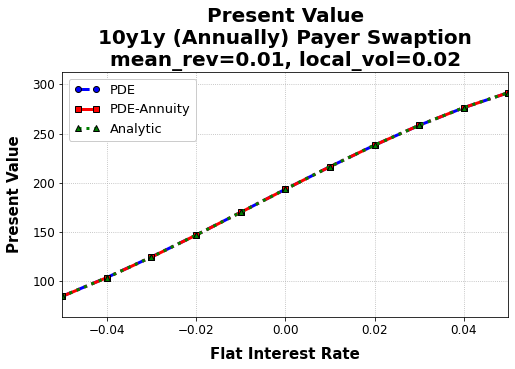

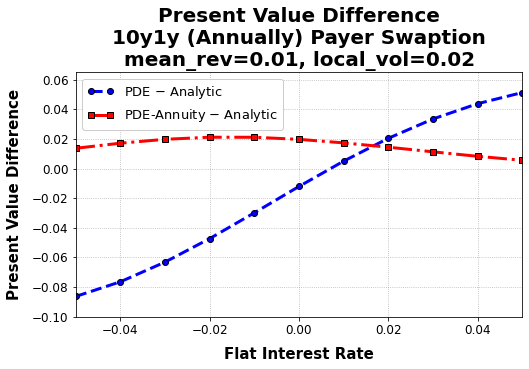

In [16]:
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot()
ax.plot(short_rates, pvs_curve, label='PDE')
ax.plot(short_rates, pvs_curve_annuity, label='PDE-Annuity')
ax.plot(short_rates, pvs_curve_analytic, label='Analytic')
ax.set_xlabel('Flat Interest Rate')
ax.set_ylabel('Present Value')
ax.set_title(f'Present Value\n'\
             f'{product.expiry:.0f}y{product.underlying_times[-1]-product.expiry:.0f}y ({frequency.name}) Payer Swaption\n'\
             f'mean_rev={mean_rev}, local_vol={local_vol}')
ax.legend()


diff = [y - x for x, y in zip(pvs_curve, pvs_curve_analytic)]
diff_annuity =  [y - x for x, y in zip(pvs_curve_annuity, pvs_curve_analytic)]
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot()
ax.plot(short_rates, diff, label='PDE $-$ Analytic')
ax.plot(short_rates, diff_annuity, label='PDE-Annuity $-$ Analytic')
ax.set_xlabel('Flat Interest Rate')
ax.set_ylabel('Present Value Difference')
ax.set_title('Present Value Difference\n'\
             f'{product.expiry:.0f}y{product.underlying_times[-1]-product.expiry:.0f}y ({frequency.name}) Payer Swaption\n'\
             f'mean_rev={mean_rev}, local_vol={local_vol}')
ax.legend()

# Multi-Period Swaption

In [18]:
curve = ch.FlatCurve(short_rate=0.01)
mean_rev = 0.01
local_vol = 0.02
process = ch.VasicekProcess(mean_rev=mean_rev, local_vol=local_vol)
process_annuity = ch.QuadraticAnnuityProcess(mean_rev=mean_rev, local_vol=local_vol, skew=0.0, smile=0.0)

model_pde = ch.CheyettePDEModel(x_grid_stddevs=3.0, y_grid_stddevs=1.0,
                    x_freq=30, y_freq=30, t_freq=10,
                    stepping_method=ch.PeacemanRachford(),
                    x_lower_bc=ch.DirichletIntrinsicBC(), x_upper_bc=ch.DirichletIntrinsicBC(),
                    y_lower_bc=ch.DirichletIntrinsicBC(), y_upper_bc=ch.DirichletIntrinsicBC())

model_analytic = ch.CheyetteAnalyticModel()

expiry = 10.0
tenor = 10.0
strike = 0.01
frequency = ch.Frequency.Annually
product = ch.PayerSwaption(strike=strike, expiry=expiry, tenor=tenor, frequency=frequency)
product_annuity_0 = ch.PayerSwaptionAnnuity(strike=strike, expiry=expiry, tenor=tenor, frequency=frequency)
product_annuity_1 = ch.PayerSwaptionAnnuity(strike=strike, expiry=expiry, tenor=tenor, frequency=frequency,
                                            number_of_updates=1)

valuation_time = 0.0
pricer = ch.CheyettePricer(model_pde, curve, process, product, valuation_time)
pricer_annuity_0 = ch.CheyettePricer(model_pde, curve, process_annuity, product_annuity_0, valuation_time)
pricer_annuity_1 = ch.CheyettePricer(model_pde, curve, process_annuity, product_annuity_1, valuation_time)
pricer_analytic = ch.CheyettePricer(model_analytic, curve, process, product, valuation_time)

pv = pricer.price()['PV']
pv_annuity_0 = pricer_annuity_0.price()['PV']
pv_annuity_1 = pricer_annuity_1.price()['PV']
pv_analytic = pricer_analytic.price()['PV']

print(f'PV PDE: {pv}')
print(f'PV PDE-Annuity-0: {pv_annuity_0}')
print(f'PV PDE-Annuity-1: {pv_annuity_0}')
print(f'PV Analytic: {pv_analytic}')
print(f'Diff(PDE, Analytic): {pv - pv_analytic}')
print(f'Diff(PDE-Annuity-0, Analytic): {pv_annuity_0 - pv_analytic}')
print(f'Diff(PDE-Annuity-1, Analytic): {pv_annuity_1 - pv_analytic}')

PV PDE: 1954.9019339719764
PV PDE-Annuity-0: 1955.6651442767916
PV PDE-Annuity-1: 1955.6651442767916
PV Analytic: 1955.7688638986265
Diff(PDE, Analytic): -0.866929926650073
Diff(PDE-Annuity-0, Analytic): -0.10371962183489813
Diff(PDE-Annuity-1, Analytic): -0.26263951794453533


In [23]:
short_rates = np.arange(-0.05, 0.0501, 0.01)
curves = [ch.FlatCurve(r) for r in short_rates]

pvs_curve = [pricer.set_curve(x).price()['PV'] for x in curves]
pvs_curve_annuity_0 = [pricer_annuity_0.set_curve(x).price()['PV'] for x in curves]
pvs_curve_annuity_1 = [pricer_annuity_1.set_curve(x).price()['PV'] for x in curves]
pvs_curve_analytic = [pricer_analytic.set_curve(x).price()['PV'] for x in curves]

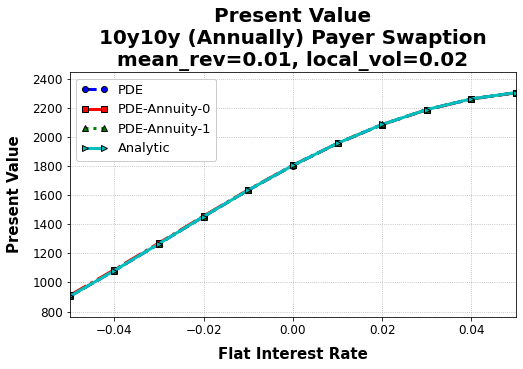

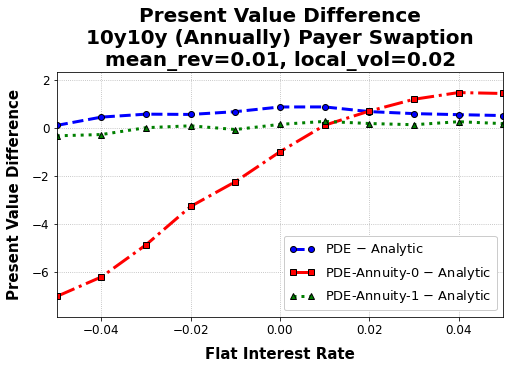

In [25]:
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot()
ax.plot(short_rates, pvs_curve, label='PDE')
ax.plot(short_rates, pvs_curve_annuity_0, label='PDE-Annuity-0')
ax.plot(short_rates, pvs_curve_annuity_1, label='PDE-Annuity-1')
ax.plot(short_rates, pvs_curve_analytic, label='Analytic')
ax.set_xlabel('Flat Interest Rate')
ax.set_ylabel('Present Value')
ax.set_title(f'Present Value\n'\
             f'{product.expiry:.0f}y{product.underlying_times[-1]-product.expiry:.0f}y ({frequency.name}) Payer Swaption\n'\
             f'mean_rev={mean_rev}, local_vol={local_vol}')
ax.legend()
fig.savefig('output/swaption10y10y_pv.pdf')


diff = [y - x for x, y in zip(pvs_curve, pvs_curve_analytic)]
diff_annuity_0 =  [y - x for x, y in zip(pvs_curve_annuity_0, pvs_curve_analytic)]
diff_annuity_1 =  [y - x for x, y in zip(pvs_curve_annuity_1, pvs_curve_analytic)]
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot()
ax.plot(short_rates, diff, label='PDE $-$ Analytic')
ax.plot(short_rates, diff_annuity_0, label='PDE-Annuity-0 $-$ Analytic')
ax.plot(short_rates, diff_annuity_1, label='PDE-Annuity-1 $-$ Analytic')
ax.set_xlabel('Flat Interest Rate')
ax.set_ylabel('Present Value Difference')
ax.set_title('Present Value Difference\n'\
             f'{product.expiry:.0f}y{product.underlying_times[-1]-product.expiry:.0f}y ({frequency.name}) Payer Swaption\n'\
             f'mean_rev={mean_rev}, local_vol={local_vol}')
ax.legend()
fig.savefig('output/swaption10y10y_pvdiff.pdf')